In [1]:
import sys
from pathlib import Path

import os

import numpy as np

In [2]:
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

In [3]:
bh_data_path = str(Path.cwd().parents[0].parents[0] / "data" / "bh" / "BH_n5_M8_res50_10000_events.h5")
bhArray = dataToArray(bh_data_path)

sph_data_path = str(Path.cwd().parents[0].parents[0] / "data" / "sph" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_10000_events.h5")
sphArray = dataToArray(sph_data_path)


In [4]:
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

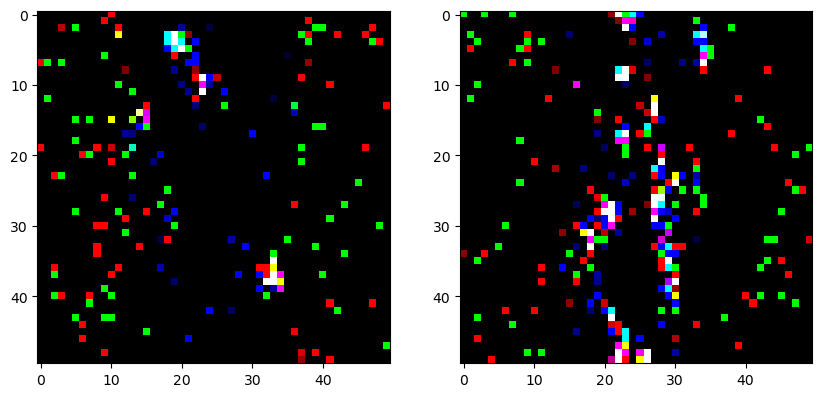

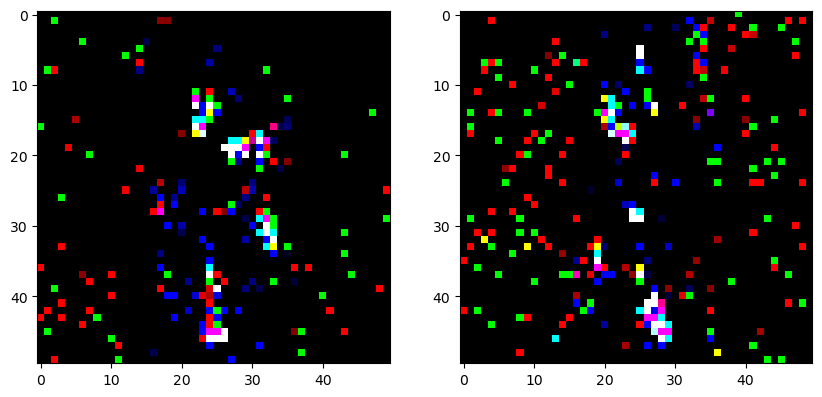

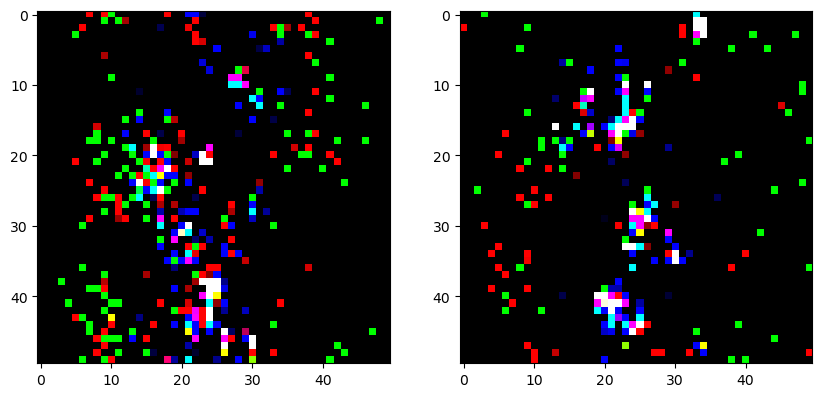

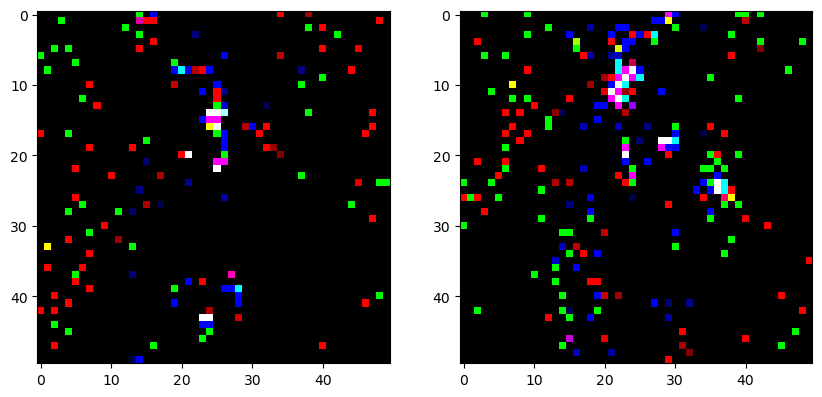

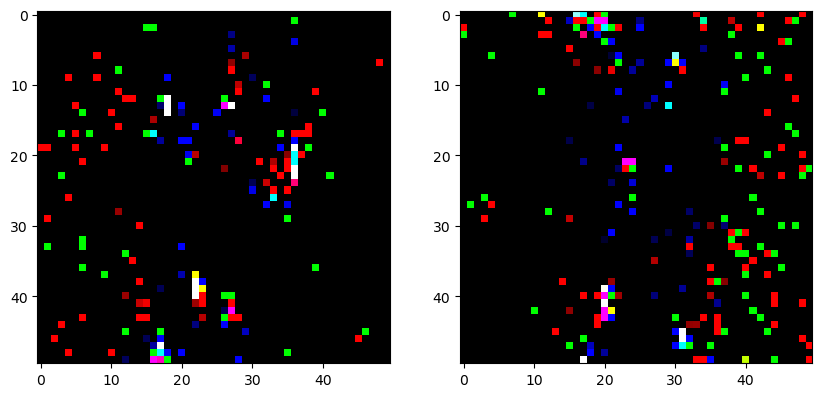

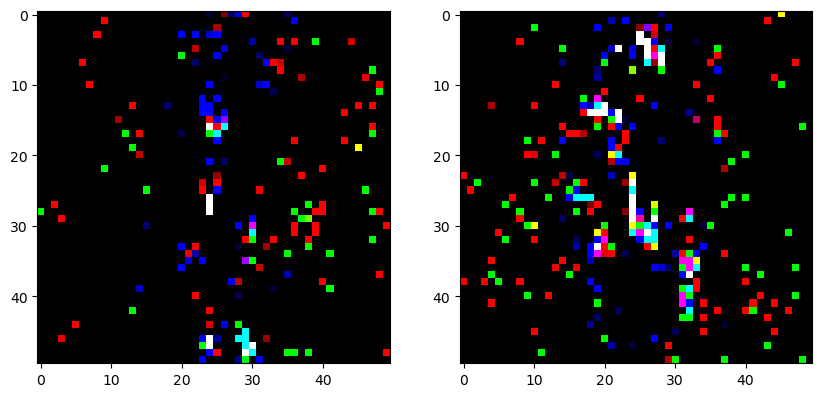

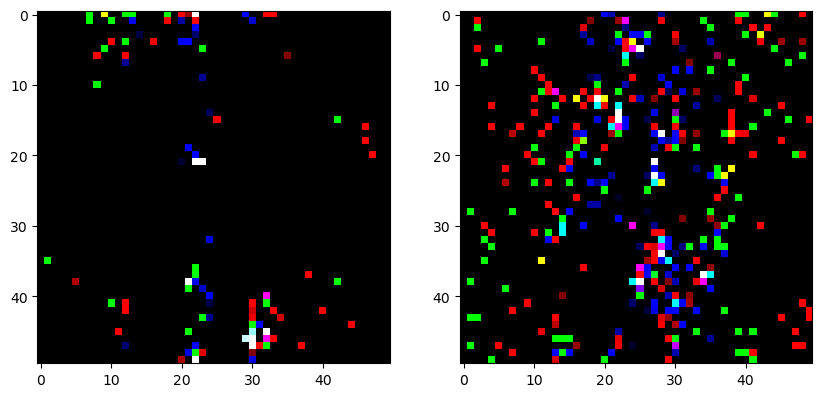

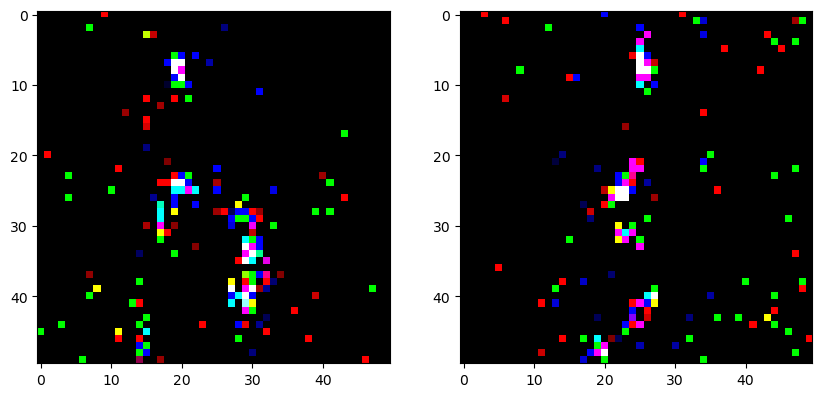

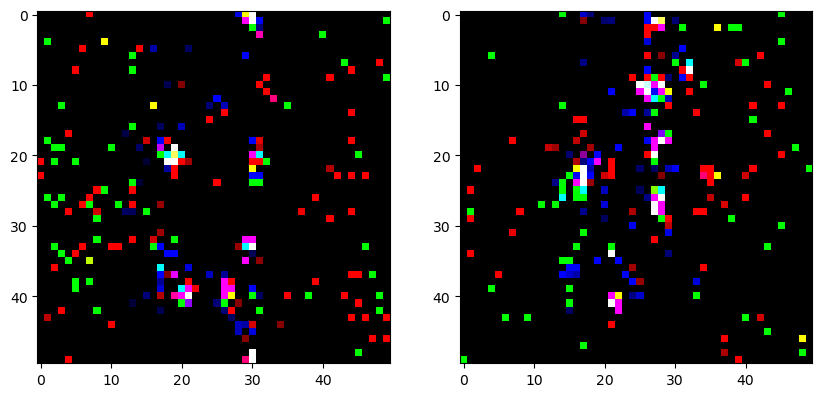

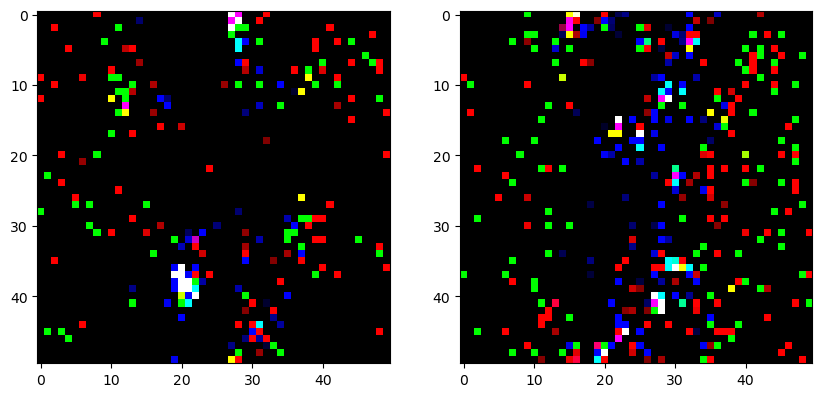

In [5]:
for i in range(10):
    f, axarr = plt.subplots(1,2, figsize=(10,10))
    axarr[0].imshow(bhArray[i])
    axarr[1].imshow(sphArray[i])

In [6]:
bhArray.shape

(10000, 50, 50, 3)

In [7]:
slice = np.zeros((50,50,1))
for rgb in range(3):
    slice = np.add(slice,bhArray[1][:,:,rgb:(1+rgb)])


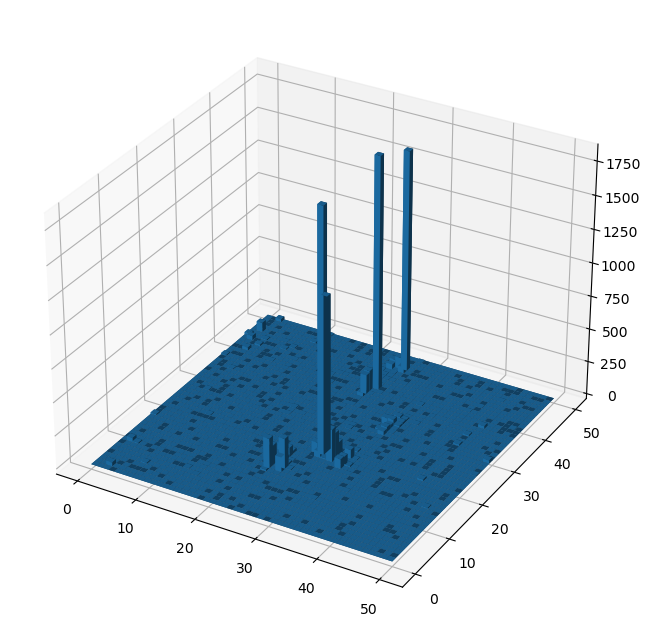

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

x_data, y_data = np.meshgrid( np.arange(slice.shape[1]),
                              np.arange(slice.shape[0]) )


x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = slice.flatten()

ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


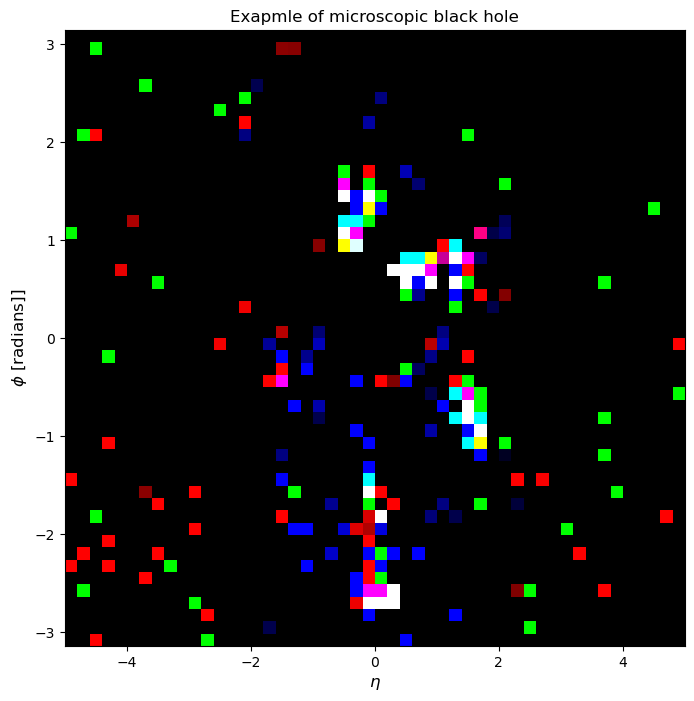

In [9]:
plt.figure(figsize=(8,8))
plt.ylabel(r"$\phi$ [radians]]", fontsize=12)
plt.xlabel(r"$\eta$", fontsize=12)
plt.imshow(bhArray[1], cmap='gray', extent=[-5, 5, -np.pi, np.pi], aspect='auto')
plt.title("Exapmle of microscopic black hole")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


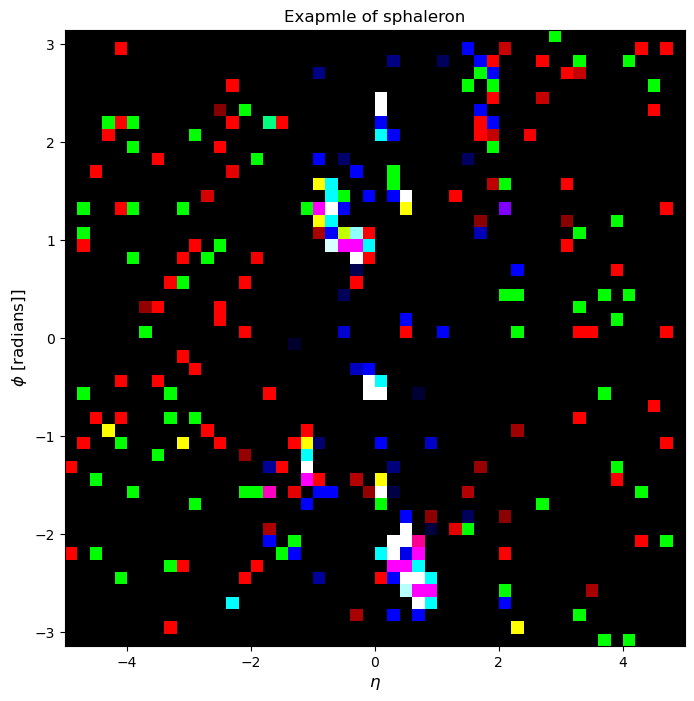

In [10]:
plt.figure(figsize=(8,8))
plt.ylabel(r"$\phi$ [radians]]", fontsize=12)
plt.xlabel(r"$\eta$", fontsize=12)
plt.imshow(sphArray[1], cmap='gray', extent=[-5, 5, -np.pi, np.pi], aspect='auto')
plt.title("Exapmle of sphaleron")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


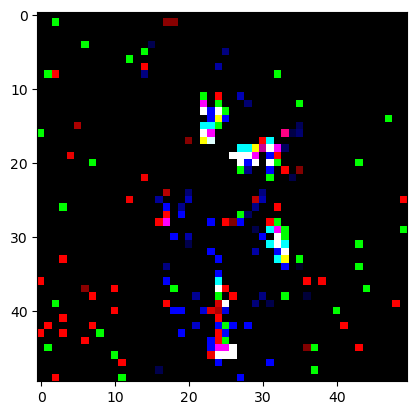

In [11]:
plt.imshow(bhArray[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


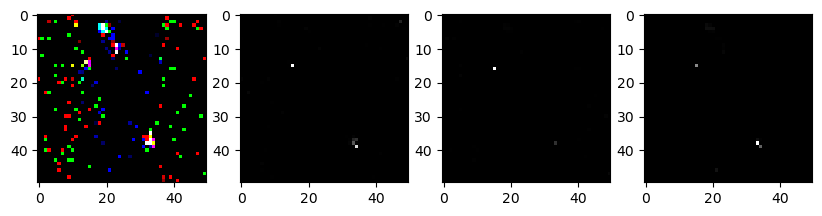

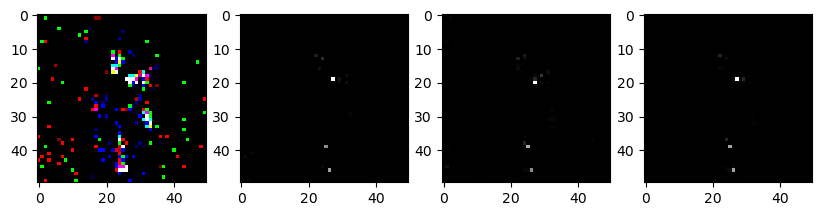

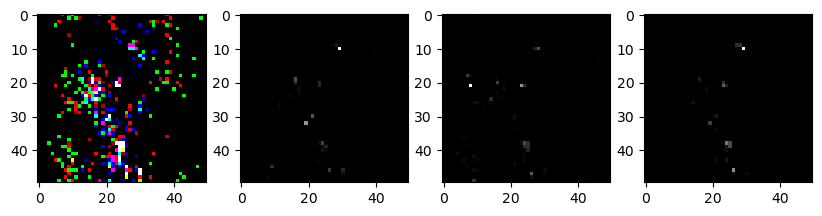

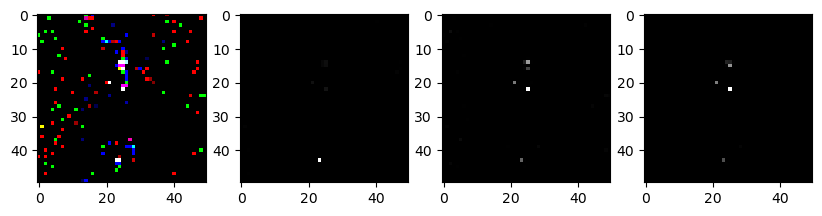

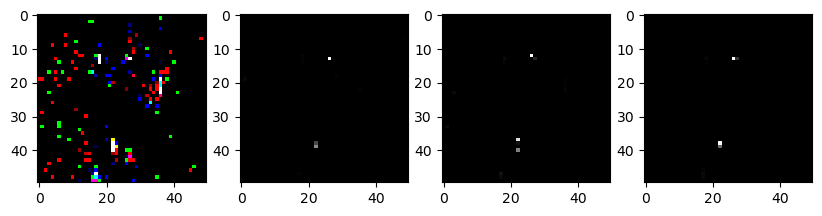

In [12]:
for i in range(5):
    f, axarr = plt.subplots(1,4, figsize=(10,10))
    axarr[0].imshow(bhArray[i])
    axarr[1].imshow(bhArray[i][:,:,0:1], cmap='gray')
    axarr[2].imshow(bhArray[i][:,:,1:2], cmap='gray')
    axarr[3].imshow(bhArray[i][:,:,2:3], cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


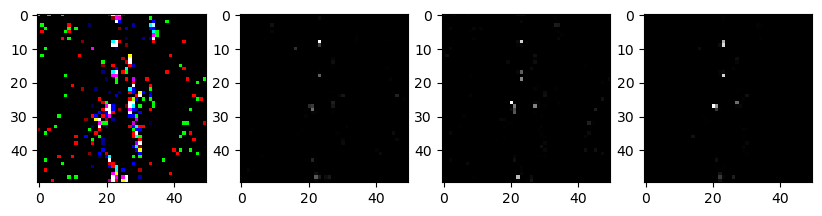

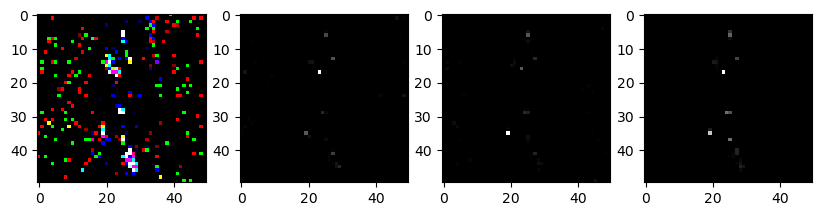

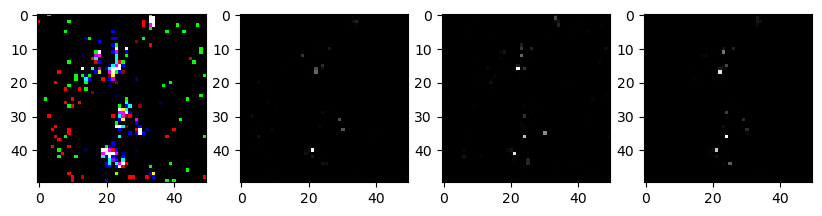

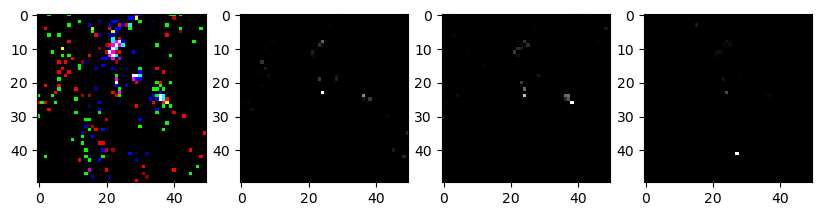

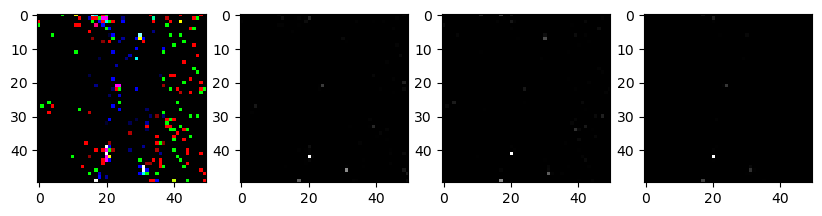

In [13]:
for i in range(5):
    f, axarr = plt.subplots(1,4, figsize=(10,10))
    axarr[0].imshow(sphArray[i])
    axarr[1].imshow(sphArray[i][:,:,0:1], cmap='gray')
    axarr[2].imshow(sphArray[i][:,:,1:2], cmap='gray')
    axarr[3].imshow(sphArray[i][:,:,2:3], cmap='gray')

In [14]:
def createMultiBarPlot(numbers, classes, axis, colors):

    def std(x):
        avg = np.mean(x)
        sigma = sum([(x_i - avg)**2 for x_i in x])
        return np.sqrt(sigma/(len(x)-1)).round(1)
    
    std = [[std(x) for x in y] for y in numbers]

    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(0.03+ rect.get_x()+rect.get_width()/2., 1.02*h, '%d'%int(h),
                    ha='center', va='bottom', fontsize=10)
            
    avg = [[int(np.mean(x).round(0)) for x in y] for y in numbers]
    numbers = avg
    N = 3
    ind = np.arange(N)  # the x locations for the groups
    width = 0.11       # the width of the bars

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    plt.grid()

    bars = [ax.bar(ind+width*i, numbers[i], width, color=colors[i]) for i in range(len(numbers))]
    for i in range(len(numbers)):
        plt.errorbar(ind+width*i, numbers[i], yerr=std[i], fmt="o", color="#000000")
    for bar in bars:
        autolabel(bar)

    ax.set_ylabel('Accuracy')
    ax.set_xticks(ind+width*(len(numbers)//2))
    ax.set_xticklabels(axis)
    ax.legend(bars, classes, loc='lower left')
    plt.ylim([0, 100])

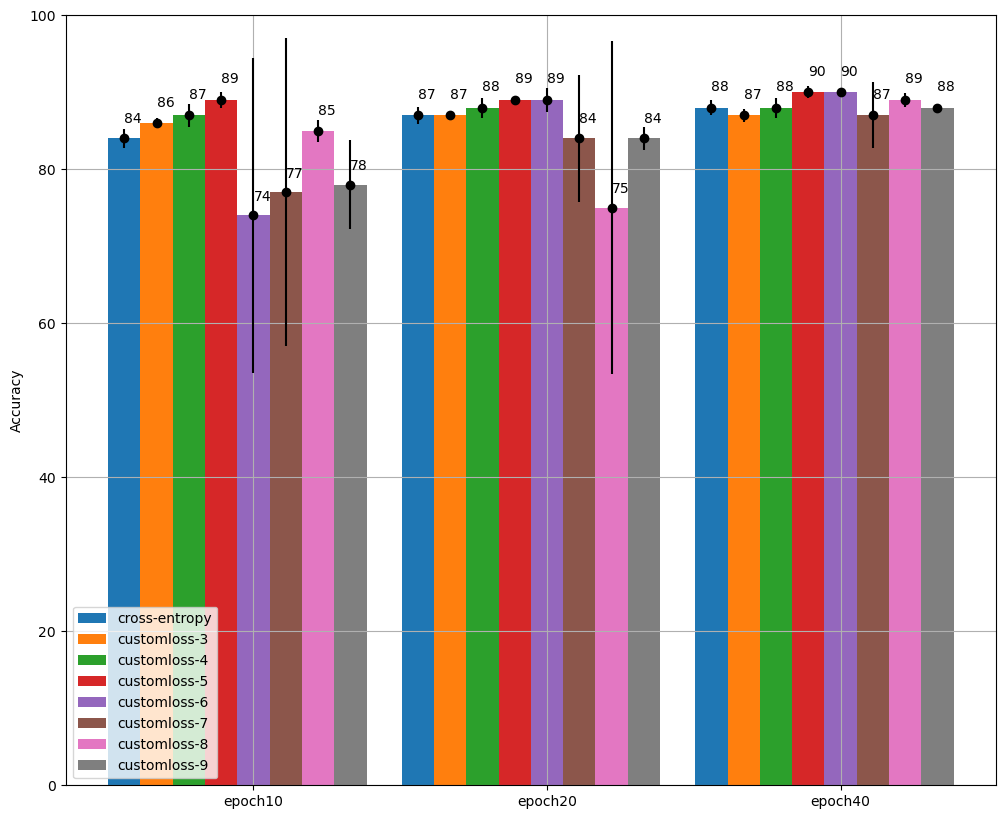

In [15]:
#CNN AVERAGE
numbers = [
    [84,86,87],
    [86,87,87],
    [87,88,88],
    [89,89,90],
    [74,89,90],
    [77,84,87],
    [86,75,89],
    [78,84,87]
]
classes = ['cross-entropy', 'customloss-3', 'customloss-4', 'customloss-5', 'customloss-6', 'customloss-7', 'customloss-8', 'customloss-9']
axis = ['epoch10', 'epoch20', 'epoch40']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]


cnnAVG = [
    [84,86,87],
    [86,87,87],
    [87,88,88],
    [89,89,90],
    [74,89,90],
    [77,84,87],
    [86,75,89],
    [78,84,87]
]

cnn = [
    [[84.2,82.8,85.2],[87.6,86.9,85.5],[86.7,88.7,87.7]],
    [[85.4,86.5,86.1],[87.0,87.0,87.4],[86.6,87.4,88.1]],
    [[87.8,85.3,88.1],[88.5,86.1,88.1],[88.6,88.2,86.1]],
    [[90.0,88.3,89.9],[89.1,89.2,89.2],[89.3,90.5,89.1]],
    [[82.4,50.6,89.0],[90.1,87.0,89.0],[89.5,89.7,90.6]],
    [[54.1,88.8,88.6],[74.6,88.6,88.9],[88.3,81.8,89.9]],
    [[86.1,85.9,83.5],[87.0,50.5,88.8],[89.3,90.0,88.2]],
    [[73.9,75.2,84.5],[82.9,83.6,85.8],[87.7,88.2,87.5]]
]




    
    

createMultiBarPlot(cnn, classes, axis, colors)

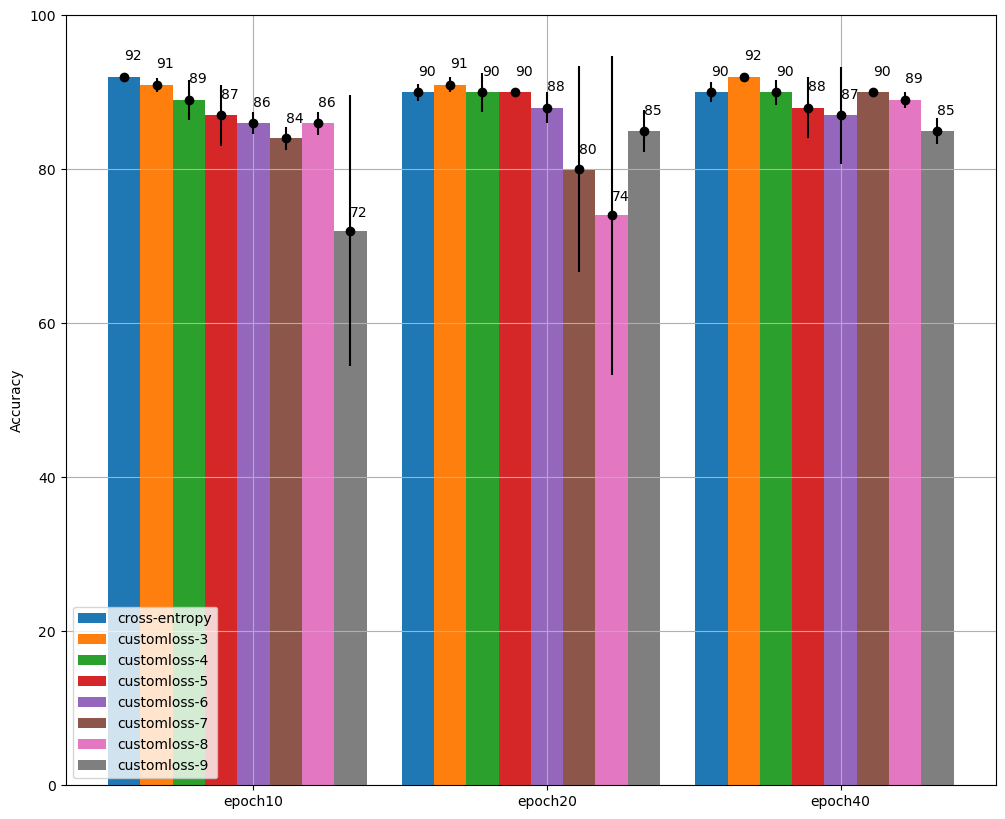

In [17]:
#RESNET34 AVERAGE
numbers = [
    [[91.5,92.5,92.0],[89.3,91.5,90.5],[91.0,88.8,91.1]],
    [[91.7,91.4,90.0],[91.3,89.4,91.1],[91.9,91.9,91.3]],
    [[86.8,87.4,91.6],[87.4,90.6,92.3],[91.4,90.8,88.4]],
    [[89.4,82.5,89.3],[89.7,89.5,89.4],[84.0,92.0,89.0]],
    [[87.2,84.5,85.4],[88.9,89.9,86.0],[91.8,88.8,79.7]],
    [[86.0,84.1,83.1],[88.8,65.0,87.6],[89.9,89.6,90.2]],
    [[84.2,87.0,86.4],[85.4,50.6,87.5],[90.1,89.1,88.1]],
    [[82.9,51.8,81.7],[83.0,83.9,88.0],[83.7,84.0,86.7]]
]

createMultiBarPlot(numbers, classes, axis, colors)

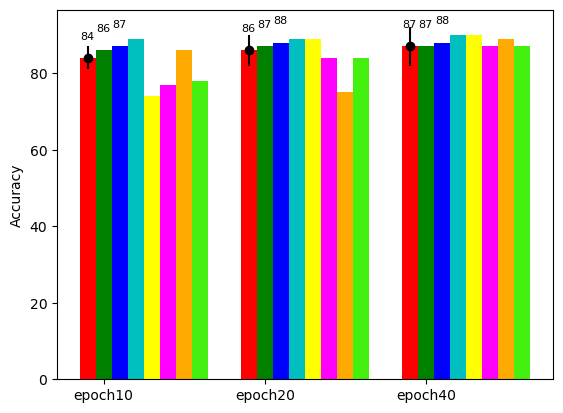

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

crossEntropy = [84,86,87]
rects1 = ax.bar(ind, crossEntropy, width, color='r')
plt.errorbar(ind, crossEntropy, yerr=[3,4,5], fmt="o", color="#000000")

custom3 = [86,87,87]
rects2 = ax.bar(ind+width, custom3, width, color='g')

custom4 = [87,88,88]
rects3 = ax.bar(ind+width*2, custom4, width, color='b')

custom5 = [89,89,90]
rects4 = ax.bar(ind+width*3, custom5, width, color='c')

custom6 = [74,89,90]
rects5 = ax.bar(ind+width*4, custom6, width, color='#FFFF00')

custom7 = [77,84,87]
rects6 = ax.bar(ind+width*5, custom7, width, color='#FF00FF')

custom8 = [86,75,89]
rects7 = ax.bar(ind+width*6, custom8, width, color='#FFAA00')

custom9 = [78,84,87]
rects8 = ax.bar(ind+width*7, custom9, width, color='#44F00F')




ax.set_ylabel('Accuracy')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('epoch10', 'epoch20', 'epoch40') )
# ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0], rects7[0], rects8[0]), ('cross-entropy', 'customloss-3', 'customloss-4', 'customloss-5', 'customloss-6', 'customloss-7', 'customloss-8', 'customloss-9') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [ ]:
##temp std calculation
cnnAVG = [
    [84,86,87],
    [86,87,87],
    [87,88,88],
    [89,89,90],
    [74,89,90],
    [77,84,87],
    [86,75,89],
    [78,84,87]
]

cnn = [
    [[84.2,82.8,85.2],[87.6,86.9,85.5],[86.7,88.7,87.7]],
    [[85.4,86.5,86.1],[87.0,87.0,87.4],[86.6,87.4,88.1]],
    [[87.8,85.3,88.1],[88.5,86.1,88.1],[88.6,88.2,86.1]],
    [[90.0,88.3,89.9],[89.1,89.2,89.2],[89.3,90.5,89.1]],
    [[82.4,50.6,89.0],[90.1,87.0,89.0],[89.5,89.7,90.6]],
    [[54.1,88.8,88.6],[74.6,88.6,88.9],[88.3,81.8,89.9]],
    [[86.1,85.9,83.5],[87.0,50.5,88.8],[89.3,90.0,88.2]],
    [[73.9,75.2,84.5],[82.9,83.6,85.8],[87.7,88.2,87.5]]
]

def std(x):
    avg = np.mean(x)
    sigma = sum([(x_i - avg)**2 for x_i in x])
    return np.sqrt(sigma/(len(x)-1)).round(1)

[[std(x) for x in y] for y in cnn]



[[1.2, 1.1, 1.0],
 [0.6, 0.2, 0.8],
 [1.5, 1.3, 1.3],
 [1.0, 0.1, 0.8],
 [20.5, 1.6, 0.6],
 [20.0, 8.2, 4.3],
 [1.4, 21.6, 0.9],
 [5.8, 1.5, 0.4]]